In [0]:
##Importing libraries 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
## Reading the data
df=input_data.read_data_sets("/tmp/data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
###Neural Network Parameters
### 28*28=784

num_inputs = 784 

num_h1 = 256 
num_h2 = 128 


In [0]:
###Tensorflow data inputs

X=tf.placeholder("float",shape=[None,num_inputs])



In [0]:
### Neural Network training parameters

batch_size=256
num_steps=40000
learning_rate=5e-1
display_step=1000

In [0]:
###Creating Network Architechture

def encoder_layer(x):
    l1=tf.matmul(x,W["w1"])
    l1=tf.add(l1,b["b1"])
    l1=tf.nn.sigmoid(l1)
    
    l1=tf.matmul(l1,W["w2"])
    l1=tf.add(l1,b["b2"])
    l1=tf.nn.sigmoid(l1)
    
    return l1
    
    

def decoder_layer(x):
    l2=tf.matmul(x,W["w3"])
    l2=tf.add(l2,b["b3"])
    l2=tf.nn.sigmoid(l2)
    
    l2=tf.matmul(l2,W["w4"])
    l2=tf.add(l2,b["b4"])
    l2=tf.nn.sigmoid(l2)
    
    return l2

In [0]:
###Model Architechture Weights


W={"w1":tf.Variable(tf.random_normal([num_inputs,num_h1])),
   "w2": tf.Variable(tf.random_normal([num_h1,num_h2])),
   "w3": tf.Variable(tf.random_normal([num_h2,num_h1])), 
   "w4": tf.Variable(tf.random_normal([num_h1,num_inputs]))} 

b={"b1":tf.Variable(tf.random_normal([num_h1])),
   "b2":tf.Variable(tf.random_normal([num_h2])),
   "b3":tf.Variable(tf.random_normal([num_h1])),
   "b4":tf.Variable(tf.random_normal([num_inputs]))}

In [0]:
###Model Architechture

encoder_fun = encoder_layer(X)
decoder_fun = decoder_layer(encoder_fun)

In [0]:
####Cost function Evaluation


# Prediction
predicted = decoder_fun

#Actual
actual=X

cost_fn=tf.reduce_mean(tf.pow(actual - predicted, 2))
optim=tf.train.RMSPropOptimizer(learning_rate=learning_rate)
training=optim.minimize(cost_fn)




Step 1, Minibatch Loss= 0.4534
Step 1000, Minibatch Loss= 0.1349
Step 2000, Minibatch Loss= 0.1142
Step 3000, Minibatch Loss= 0.1007
Step 4000, Minibatch Loss= 0.0921
Step 5000, Minibatch Loss= 0.0879
Step 6000, Minibatch Loss= 0.0902
Step 7000, Minibatch Loss= 0.0839
Step 8000, Minibatch Loss= 0.0832
Step 9000, Minibatch Loss= 0.0778
Step 10000, Minibatch Loss= 0.0780
Step 11000, Minibatch Loss= 0.0775
Step 12000, Minibatch Loss= 0.0746
Step 13000, Minibatch Loss= 0.0691
Step 14000, Minibatch Loss= 0.0685
Step 15000, Minibatch Loss= 0.0676
Step 16000, Minibatch Loss= 0.0657
Step 17000, Minibatch Loss= 0.0641
Step 18000, Minibatch Loss= 0.0604
Step 19000, Minibatch Loss= 0.0624
Step 20000, Minibatch Loss= 0.0606
Step 21000, Minibatch Loss= 0.0595
Step 22000, Minibatch Loss= 0.0582
Step 23000, Minibatch Loss= 0.0596
Step 24000, Minibatch Loss= 0.0592
Step 25000, Minibatch Loss= 0.0571
Step 26000, Minibatch Loss= 0.0564
Step 27000, Minibatch Loss= 0.0554
Step 28000, Minibatch Loss= 0.053

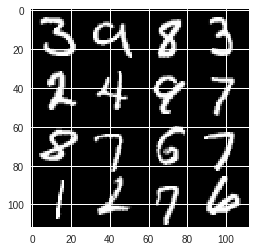

Reconstructed Images


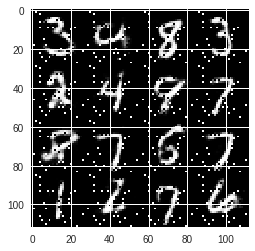

In [43]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

###Staring the Model training Session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, _ = df.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(training, feed_dict={X: batch_x})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, _ = sess.run([cost_fn, training], feed_dict={X: batch_x})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss))

    print("Optimization Finished!")
    
    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))


    for i in range(n):

        batch_x, _ = df.test.next_batch(n)

        # Session 
        g = sess.run(decoder_fun, feed_dict={X: batch_x})
    
        # original images
        for j in range(n):
            # Draw the generated digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    
        #  reconstructed images
        for j in range(n):
            # Draw the generated digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

    print("Original Images")     
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()

   
